# Quiz



# Regression

Regression allows us to:
* determine the *nature* of a relationship between one (or more!) independent variables and a dependent variable
* determine the *strength* of the relationship

Regression *fits* a function to a dataset.

**Regression is *not* the same as interpolation**: we don't want to fit so closely that we exactly pass through each data point, but rather fit so that we generalize over the data. Why is this?
* because the data sets we have are not *all* the data, but a *sample* of the data, and other samples may be somewhat different
* because we want to be able to *explain* relationships between variables

Both of these require some generalization/abstraction away from the actual data.

Okay, so we need three things:
1. a function
2. a method for making the function "fit" the data
3. a measure of how "good" the fit is

## Linear Regression

There are lots of types of regression. Today we will look at the most basic: linear regression.

For linear regression, the function we fit looks like:

$\hat{y_i} = b + m x_i$

The $m$ is the *slope* (or a *weight* for $x_i$).

The $b$ is the *bias* (offset, intercept). It says where the function will cross the y axis.

The $x_i$ is the value of the *independent variable* (feature) for the $i$ th data point.

The $\hat{y_i}$ we want to be as close as possible to $y_i$, the value of the *dependent variable* (label) for the $i$ th data point. For linear regression, $y_i$ s should be quantitative.

Notice  that this function tries to calculate one variable ($y_i$) as a function of one other variable ($x_i$). Next week, we will look at functions that calculate $y_i$ as a function of multiple other variables.

**Question**: What type of function is this? Does it fit:
* An upside down U shape curve?
* A line?
* An S shape curve?

## What does it mean to *fit* a function? 

Now let's talk about methods for making the function "fit" the data. We know $x_i$, and we know $y_i$. We do *not* know the values for $b$ or $m$; that's what we need to figure out. In order to do that, we need a notion of "goodness of fit".

## How do we measure how "good" the fit is?

If we have a function and a set of data points, how well does the function fit the data? 

The "bit left over" or the "distance", which we call the *residual*, is often calculated as: $r_i = y_i - \hat{y_i}$. Look at the picture: if the diagonal line is the function we fit to the data, the length of each vertical line is a residual.

<img src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/residuals.png" alt="drawing" width="400"/>

*Image from https://statisticsbyjim.com/regression/mean-squared-error-mse/*

And how can we combine these residuals? We could:
* Take the average, median, min or max of the distances
* Take the average, median, min or max of the absolute distances
* Take the sum of the absolute distances

**Question**: What is not great about each of these?
* Think about data points that fall *above* or *below* the line we fit.
* Think about small and large data sets.


What we will do is take the mean of the sum of the square of the distances (MSSE, or *mean sum of squared error*):

$MSSE = 1 / N \sum_{i=1}^N (r_i)^2 = 1/N \sum_{i=1}^N (y_i - \hat{y}_i)^2$

What is good about this measure of goodness of fit?

## Now in python

Let's load and look at our data. (These first three cells have been seen often before.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# For today we only care about price and year
data = np.array(np.genfromtxt('data/vehiclesNumeric.csv', delimiter=',', skip_header=1, dtype=int, encoding="utf-8", usecols=[1,2]))  

In [3]:
def getSummaryStatistics(data):
    print("min, max, mean, std per variable")
    return pd.DataFrame([data.min(axis=0), data.max(axis=0), data.mean(axis=0), data.std(axis=0)])

def getShapeType(data):
    print("shape")
    return (data.shape, data.dtype)

print(getSummaryStatistics(data))
print(getShapeType(data))

min, max, mean, std per variable
              0            1
0      0.000000  1999.000000
1  55000.000000  2021.000000
2   7978.281507  2012.381887
3   5542.906703     3.997048
shape
((3158, 2), dtype('int64'))


We don't need to transform this data, since we only have one independent variable.

**Team exercise**: in your teams, implement linear_regression and msse. Assume that $x$, $y$ and $\hat{y}$ are numpy arrays.

In [4]:
def linear_regression(x, m, b):
    ??

def msse(y, yhat):
    ??
    return r


What happens if we set the slope to 0 and the intercept to the mean value for price?

In [5]:
# x is model year
x = data[:, 1]

# y is price
y = data[:, 0]

# calculate yhat
yhat = linear_regression(x, 0, y.mean())
print(msse(y, yhat))

30723814.716510456


Let's plot the line we fit.

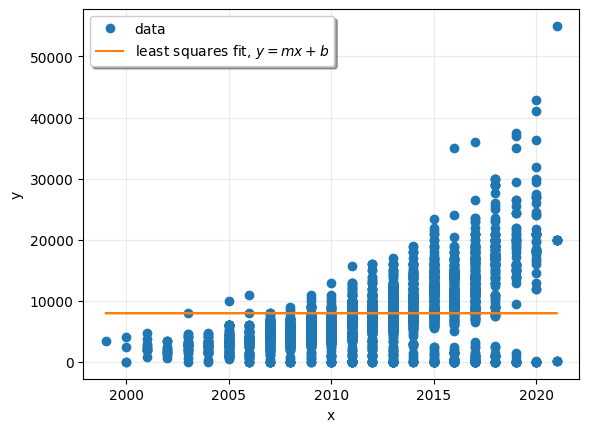

In [6]:
def plotxyyhat(x, y, yhat):
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, yhat, label='least squares fit, $y = mx + b$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(framealpha=1, shadow=True)
    plt.grid(alpha=0.25)
    plt.show()

plotxyyhat(x, y, yhat)

Can we do better than just guessing the slope and intercept? Come back on Monday!